# Assignment 01: Supervised learning, Linear models, and Loss functions



## Data set 

In this assignment, you'll be working with some data on possums.  It's a relatively small data set, but it's a good size to get you started with ordinary least squares (OLS) and least absolute deviation (LAD), and to gain experience with supervised learning in general.  You're going to write your own methods to fit both OLS and LAD models, and then at the end compare them to the models produced by the `statsmodels` package.

For this assignment, we will examine some data representing possums in Australia and New Guinea.
The code below loads in a pandas data frame with 46 observations on the following 6 variables:

sex: Sex, either m (male) or f (female).  
age: Age in years.  
headL: Head length, in mm.  
skullW: Skull width, in mm.  
totalL: Total length, in cm.  
tailL: Tail length, in cm.

## Task 1: OLS estimation and plotting


In [2]:
#It's dangerous to go alone.  Take these!
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Read in the data you will need for this assignment
possum_data=pd.read_csv('possum.csv')

### Question 1:

Investigate the relationship between the possum's age and it's tail length by plotting a scatter plot of the `age` and `tailL` columns. Label your plot and your axes. You might want to add an `alpha` in case some data are overlapping.  Perform any other exploratory analysis you think might be useful (optional.)

,age,headL,skullW,totalL,tailL
age,1.000000,0.401102,0.469666,0.452465,0.472087
headL,0.401102,1.000000,0.578853,0.542029,0.267032
skullW,0.469666,0.578853,1.000000,0.423130,0.206022
totalL,0.452465,0.542029,0.423130,1.000000,0.862646
tailL,0.472087,0.267032,0.206022,0.862646,1.000000


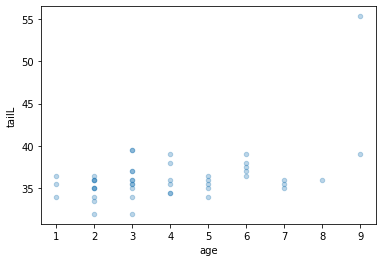

In [3]:
# YOUR CODE HERE

possum_data.plot.scatter('age', 'tailL', alpha=0.3)

y = possum_data['tailL'].values 

X = possum_data['age'].values

m = X.shape[0]

X = np.c_[np.ones((m, 1)), X]

b = np.zeros(2)

possum_data.corr()

In [5]:
X.shape, y.shape

((46, 2), (46,))

### Question 2:

Recall that the linear model, we obtain predictions by computing 

$$ \mathbf{\hat{y}} = \mathbf{X} \beta $$

Here, $\mathbf{X}$ is a design matrix, $\beta$ are coefficients, and $\mathbf{\hat{y}}$ are fitted/estimates/predicted values. Define a model-prediction function `yhat = linearModelPredict(beta,X)` that takes a parameter vector `beta` and a matrix `X` of inputs, and produces a vector `yhat` containing the predicted (fitted) values that correspond to each row of the input matrix. Assume that `beta` has $p$ rows and $1$ column, and that `X` has $n$ rows and $p$ columns.

Hint: As of Python 3.5, the `@` symbol can be used for matrix multiplication.

In [6]:
def linearModelPredict(b,X):
    # YOUR CODE HERE
    yp = X@b
    return yp
    

### Question 3:

Write a function `linearModelLossRSS` which computes the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss. Define a squared error loss function `(loss, gradient) = linearModelLossRSS(beta,X,y)` that takes a parameter vector `beta`, a matrix `X` of inputs, and a vector `y` of observed values, and produces the sum of squared errors between the observed and predicted (fitted) values, along with the gradient of the loss. Assume that `theta` has $p$ rows and $1$ column, and that `X` has $n$ rows and $p$ column, and that `y` has `n` rows and `1` column.

In [7]:
def linearModelLossRSS(b,X,y):
    # YOUR CODE HERE
    predY = linearModelPredict(b,X)
    test_error = y.T@y - 2*y.T@X@b + b.T@X.T@X@b
    gradient = (-2*(X.T@y))+(2*(X.T@X@b))
    return (test_error, gradient)

### Question 4: 

#### Part 1

Now that you've implemented a loss function in question 3, it is now time to minimize it to fit the data!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument an 2d-array `X` which houses the input data with one example per row, as its second argument a 1d-array `y` of outcomes with one example per row, and as its third argument a function `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss.

Use this function to estimate the parameters that describe the relationship between a possum's age and its tail length, i.e., $\widehat{\mathit{TailLength}} = \beta_0 + \beta_1 \mathit{age}$.

In [8]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    # YOUR CODE HERE
    RESULT = so.minimize(lossfcn, [0,0], args=(X, y), jac=True)
    b = RESULT.x
    yhat = linearModelPredict(b,X)
    ybar = sum(y)/len(y)
    RSS = sum((y-yhat)**2)
    TSS = sum((y-ybar)**2)
    R2 = 1 - (RSS/TSS)
    return (b,R2)

In [9]:
b, R2 = linearModelFit(X,y,lossfcn = linearModelLossRSS)
print('The coefficients of the model are %s' % b)
print('The R2 of the model is %s' % R2)

The coefficients of the model are [33.35046603  0.75372837]
The R2 of the model is 0.22286587947604053


#### Part 2

Using your solution, plot the data points and the fitted line below. Label your plot and your axes.

Text(0.5, 0, 'Age (yr)')

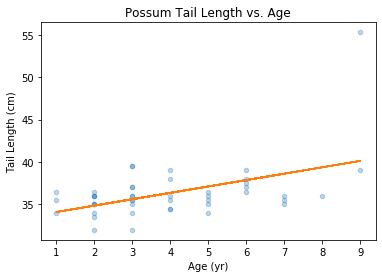

In [10]:
# YOUR CODE HERE
possum_data.plot.scatter('age', 'tailL', alpha=0.3)
plt.plot(X, 33.35046603 + 0.75372837 * X, '-')
plt.title('Possum Tail Length vs. Age')
plt.ylabel('Tail Length (cm)')
plt.xlabel('Age (yr)')

#raise NotImplementedError()

# Task 2: Least Absolute Deviation Loss

### Question 1: 

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument a 2d-array `X` of data, and as its third argument a 1d-array `y` of observed outcomes.



In [11]:
def linearModelLossLAD(b,X,y):
    # YOUR CODE HERE
    predY = linearModelPredict(b,X)
    sum_abs_dev = np.sum(np.abs(y - predY))
    grad = np.zeros(2)
    grad[0] = -1*sum(np.sign(y - predY))
    grad[1] = -1*sum(np.sign(y - predY)@X)
    return (sum_abs_dev,grad)

### Question 2

Use `linearModelLossLAD` to fit a linear model with least absolute deviation loss.  Report the coefficients of the model, the R squared, and plot the fit.

In [13]:

# YOUR CODE HERE
RESULTS = so.minimize(linearModelLossLAD, [0,0], args=(X,y), jac=True)
b = RESULTS.x
yhat = linearModelPredict(b,X)
ybar = sum(y)/len(y)
RSS = sum((y-yhat)**2)
TSS = sum((y-ybar)**2)
R2 = 1 - (RSS/TSS)


print('The coefficients of the model are %s' % RESULTS.x)
print('The R2 of the model is %s' % R2)

The coefficients of the model are [34.50403992  0.3347608 ]
The R2 of the model is 0.13059970565304257


Plot the fit below

Text(0.5, 0, 'Age (yr)')

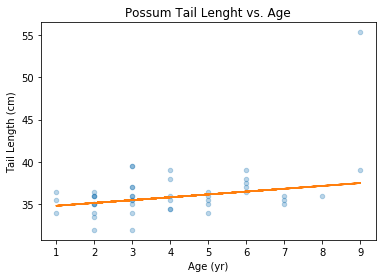

In [71]:
possum_data.plot.scatter('age', 'tailL', alpha=0.3)
plt.plot(X, 34.50403992 + 0.3347608 * X, '-')
plt.title('Possum Tail Lenght vs. Age')
plt.ylabel('Tail Length (cm)')
plt.xlabel('Age (yr)')

# Task 3: Comparing With `Statsmodels`


Fit both an OLS and a LAD model with `statsmodels`. Compare coefficient estimates, R squared values, and plot the fits. Discuss any differences or similarities between your implementation and `statsmodels`, and discuss any differences between the OLS model and the LAD model.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     12.62
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000925
Time:                        11:38:30   Log-Likelihood:                -114.32
No. Observations:                  46   AIC:                             232.6
Df Residuals:                      44   BIC:                             236.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.3505      0.947     35.222      0.0

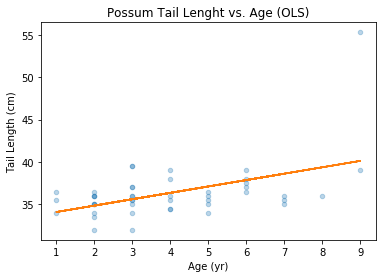

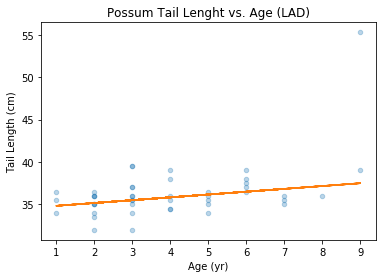

In [86]:
# YOUR CODE HERE
#OLS
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
possum_data.plot.scatter('age', 'tailL', alpha=0.3)
plt.plot(X, 33.3505 + 0.7537 * X, '-')
plt.title('Possum Tail Lenght vs. Age (OLS)')
plt.ylabel('Tail Length (cm)')
plt.xlabel('Age (yr)')

print('----------')
print('My implementation of OLS had coefficients of %s and the R2 was %s' % 
      linearModelFit(X,y,lossfcn = linearModelLossRSS))
print('----------')


#LAD
mod = smf.quantreg('tailL ~ age', possum_data)
res = mod.fit(q=.5)
possum_data.plot.scatter('age', 'tailL', alpha=0.3)
plt.plot(X, 34.5000 + 0.3333 * X, '-')
plt.title('Possum Tail Length vs. Age (LAD)')
plt.ylabel('Tail Length (cm)')
plt.xlabel('Age (yr)')
print(res.summary())

print('----------')
print('My implementation of OLS had coefficients of %s and the R2 was %s' % 
      linearModelFit(X,y,lossfcn = linearModelLossLAD))
print('----------')

Discuss differences below.

For the OLS implementation the coefficients and R squared value were pretty well the same as the statsmodels implementation. 

For the LAD implementation the coefficients were congruent with the statsmodels implementation but the R2 value was different. 

I think the R2 value may be different because it is a pseudo R-Squared. My R2 = 0.13059970565304257 and statsmodels R2 = 0.03058.

The difference between the OLS and LAD loss functions is that the OLS is more sensitive to outliers and the datapoint that is in the top right corner of the graph is causing the OLS fit to be steeper whereas the LAD is less steep and wasn't thrown off by the outlier. 

The LAD is more robust to outliers because big errors don't have as much influence (error is not squared).

OLS is very common and is easier to implement.